# Dataset Overview:
The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

The dataset comprises 2.7K rows and 7 columns, including:

Age
Sex
BMI (Body Mass Index)
Children
Smoker
Region
Charges
Problem Statement:

What are the primary factors influencing medical expenses?
How accurate are machine learning models in predicting medical expenses?
In what ways can machine learning models enhance the efficiency and profitability of health insurance companies?
If you find the dataset intriguing, please consider upvoting. Thank you.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML
from sklearn.model_selection import train_test_split
# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Accuracy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
# load data
insurance_df=pd.read_csv('medical_insurance.csv')

# EDA

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
388,26,female,22.610,0,no,northwest,3176.81590
2374,34,male,34.675,0,no,northeast,4518.82625
2061,45,male,21.375,0,no,northwest,7222.78625
1021,22,female,31.020,3,yes,southeast,35595.58980
1801,43,female,35.640,1,no,southeast,7345.72660


In [5]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

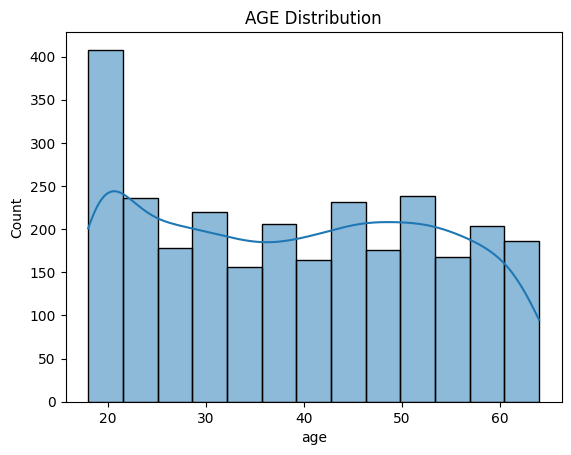

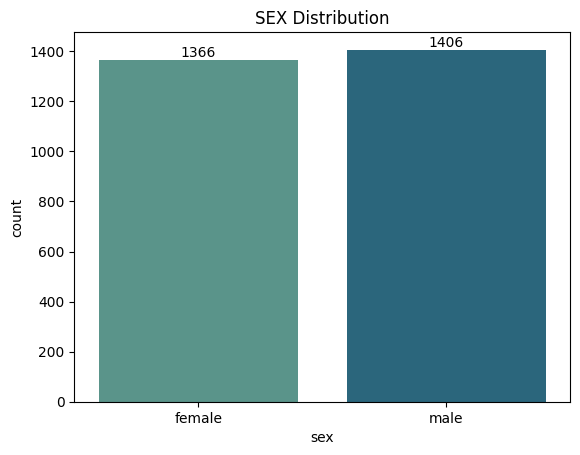

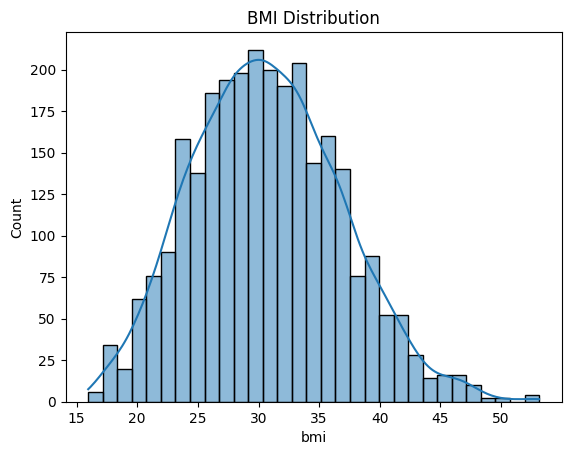

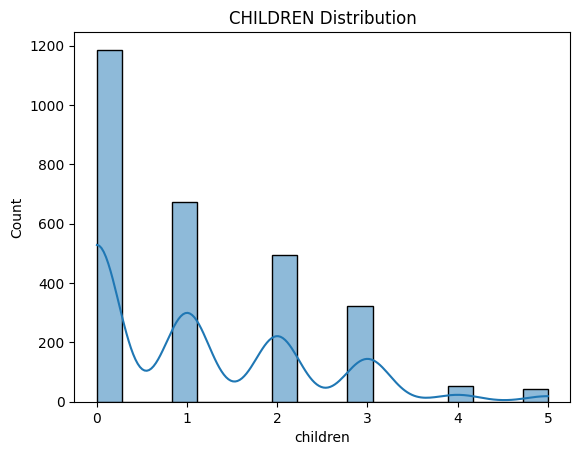

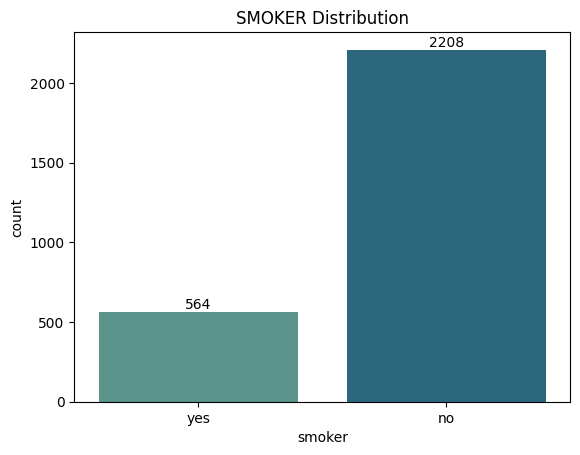

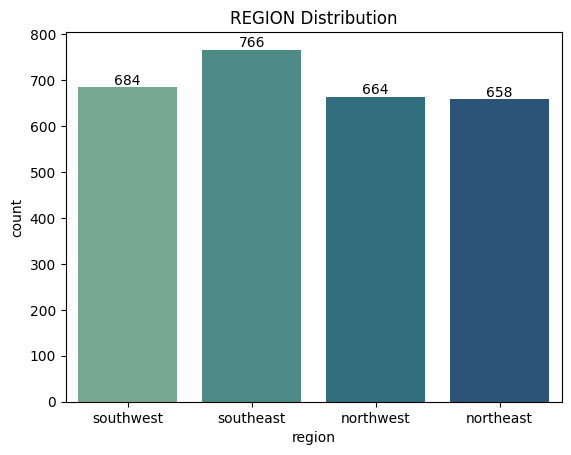

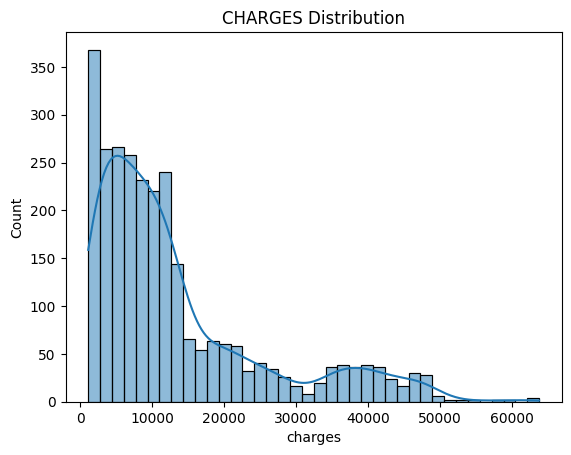

In [7]:
# Function to show distribution of values in columns
# Countplot for categorical columns
# Histplot for quantitative columns
def hist_plot(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Checking if column is categorical
           ax= sns.countplot(x=column, data=df,palette='crest')
           for i in ax.containers:
                ax.bar_label(i,)
        else:
            sns.histplot(x=column, data=df, kde=True)
        plt.title(f'{column.upper()} Distribution')
        plt.show()  
hist_plot(insurance_df)

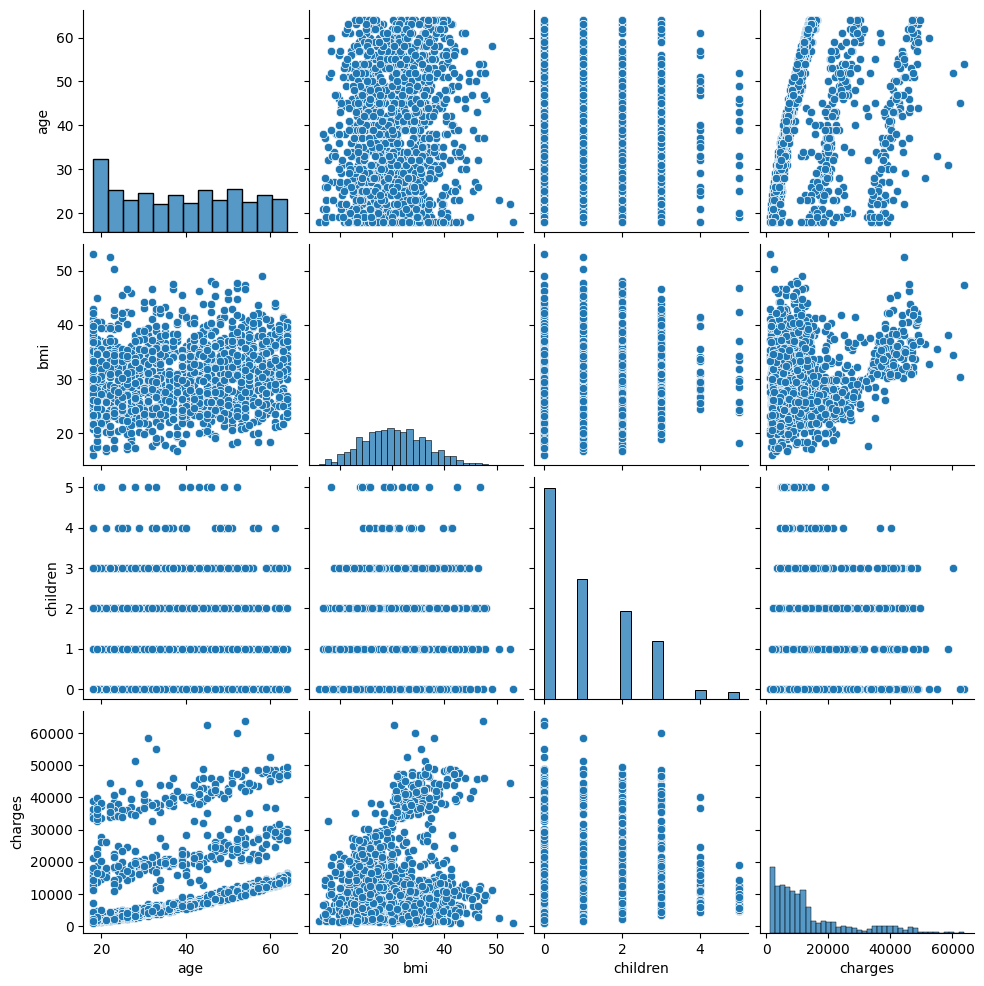

In [8]:
# pairwise relationships between variables
sns.pairplot(data=insurance_df)

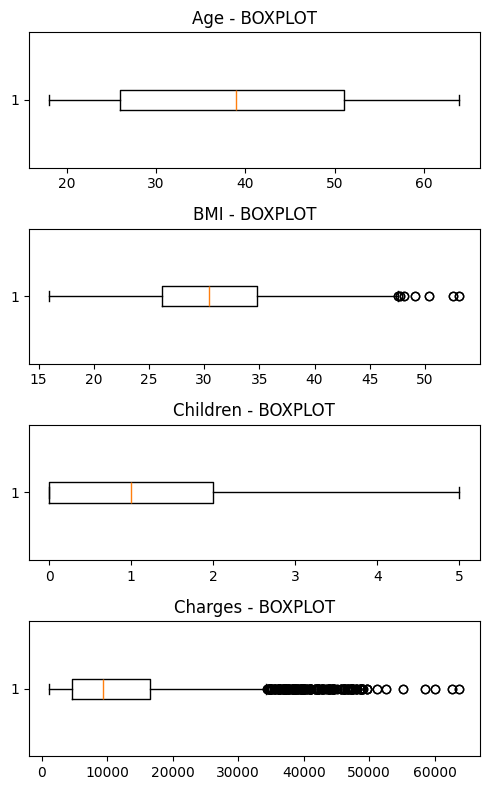

In [9]:
#subploits boxplots
fig, axs = plt.subplots(4, figsize=(5,8))

axs[0].boxplot(insurance_df['age'], vert=False)
axs[0].set_title('Age - BOXPLOT')

axs[1].boxplot(insurance_df['bmi'], vert=False)
axs[1].set_title('BMI - BOXPLOT')

axs[2].boxplot(insurance_df['children'], vert=False)
axs[2].set_title('Children - BOXPLOT')

axs[3].boxplot(insurance_df['charges'], vert=False)
axs[3].set_title('Charges - BOXPLOT')

plt.tight_layout()

plt.show()

In [10]:
# Encode the sex column
insurance_df['sex'] = insurance_df['sex'].replace({'male':1,'female':0})

In [11]:
# Encode the region column
insurance_df['region'] = insurance_df['region'].replace({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [12]:
# encode the smoker column
insurance_df['smoker'] = insurance_df['smoker'].replace({'yes':1,'no':0})


In [13]:
# view changes
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


<Axes: >

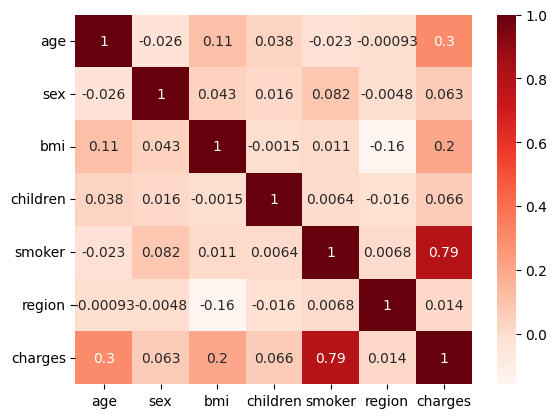

In [14]:
# Check relationships between variables
sns.heatmap(insurance_df.corr(numeric_only=True),annot=True,cmap='Reds')

# Modelling

In [15]:
# Separate features and target
X = insurance_df.drop('charges',axis=1)
y = insurance_df['charges']

In [16]:
# Split training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [17]:
# Models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(2)
gbr = GradientBoostingRegressor()

In [18]:
# Training Models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [19]:
#predict
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
elasticnet_pred = elasticnet.predict(X_test)
dtr_pred = dtr.predict(X_test)
rfr_pred = rfr.predict(X_test)
gbr_pred = gbr.predict(X_test)

In [20]:
#Dictionary
models = {
    'Linear Regression': lr_pred,
    'Ridge Regression': ridge_pred,
    'Lasso Regression': lasso_pred,
    'ElasticNet Regression': elasticnet_pred,
    'Decision Tree Regression': dtr_pred,
    'Random Forest Regression': rfr_pred,
    'Gradient Boosting Regression': gbr_pred,
}

In [21]:
#Models performance
for model_name, predictions in models.items():
    r2_score_model = r2_score(y_test, predictions)
    mse_score = mean_squared_error(y_test, predictions)
    mae_score = mean_absolute_error(y_test, predictions)

    print("Model:", model_name)
    print("R2 Score:", r2_score_model)
    print("MSE Score:", mse_score)
    print("MAE Score:", mae_score)
    print()

Model: Linear Regression
R2 Score: 0.7631675251373392
MSE Score: 34524731.49528805
MAE Score: 4094.455287582322

Model: Ridge Regression
R2 Score: 0.7632950968362534
MSE Score: 34506134.47368464
MAE Score: 4099.485495368679

Model: Lasso Regression
R2 Score: 0.7631882435711557
MSE Score: 34521711.22382852
MAE Score: 4094.6748539359596

Model: ElasticNet Regression
R2 Score: 0.41106278315057454
MSE Score: 85853510.12820221
MAE Score: 7189.6315020881875

Model: Decision Tree Regression
R2 Score: 0.9357007326888186
MSE Score: 9373355.324474059
MAE Score: 705.6121832932694

Model: Random Forest Regression
R2 Score: 0.9131478361042238
MSE Score: 12661049.292438805
MAE Score: 1398.22056546875

Model: Gradient Boosting Regression
R2 Score: 0.9015833012816221
MSE Score: 14346892.671180537
MAE Score: 2080.0196411325774



## Notes
- R2 Score: The more closer to 1 the better
- MSE Score: The more closer to 0 the better
- MAE Score: The more closer to 0 the better

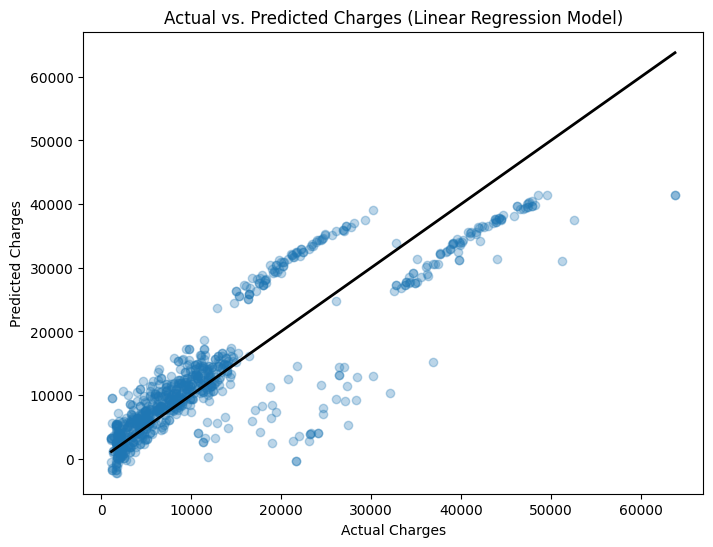

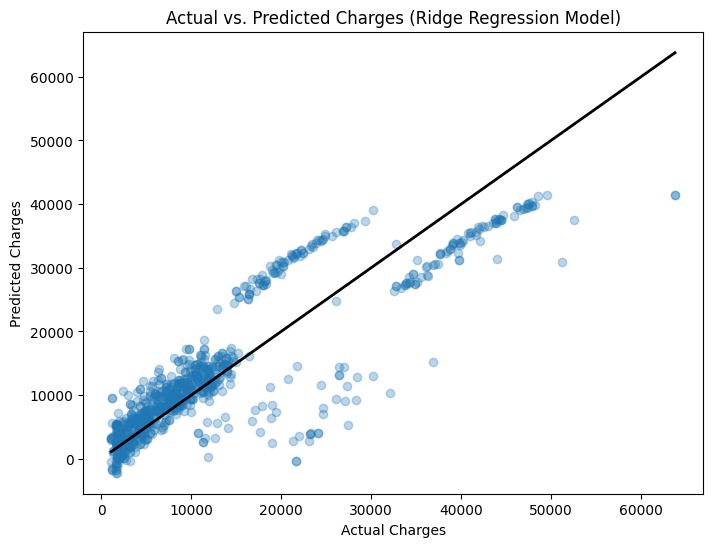

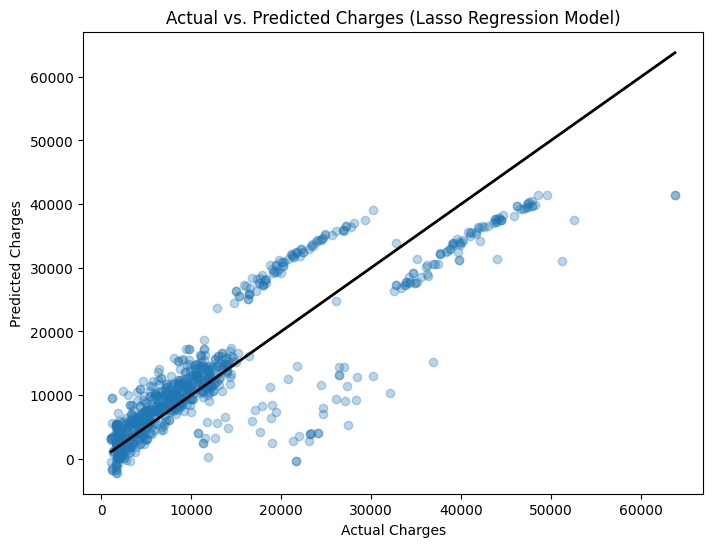

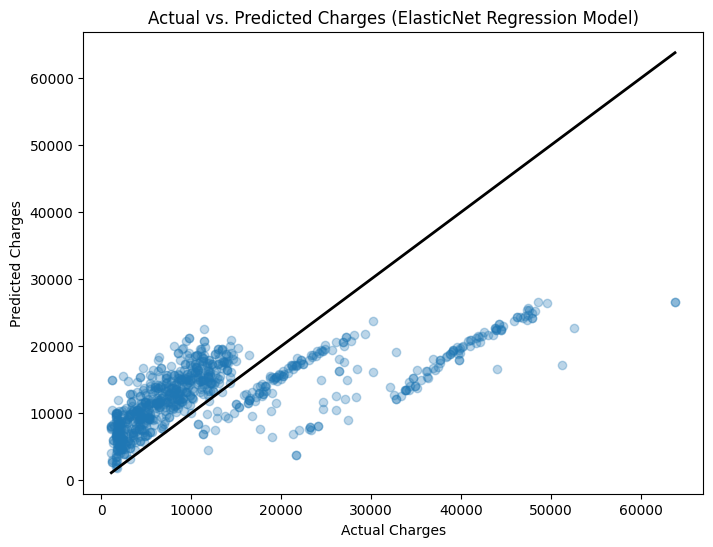

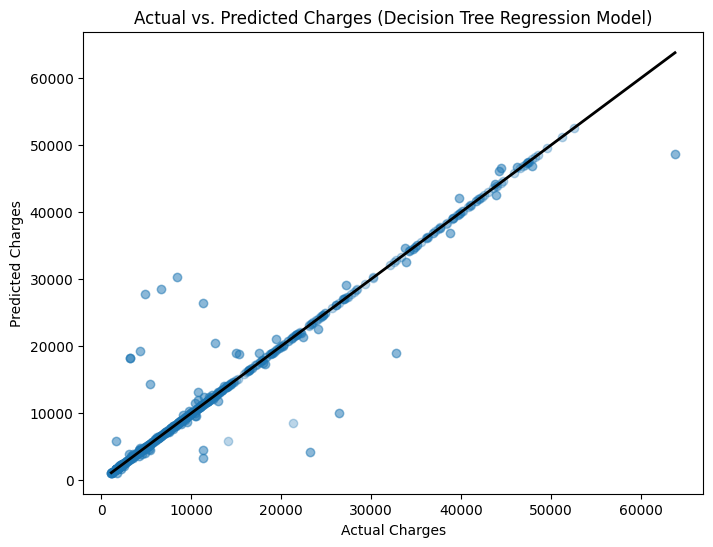

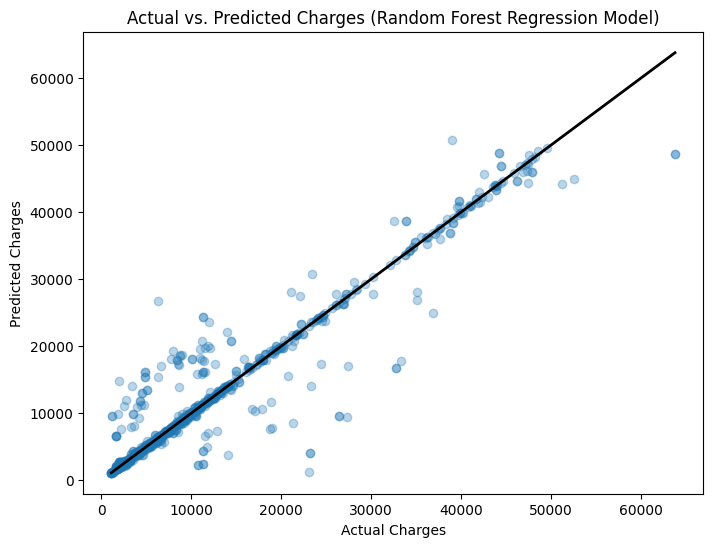

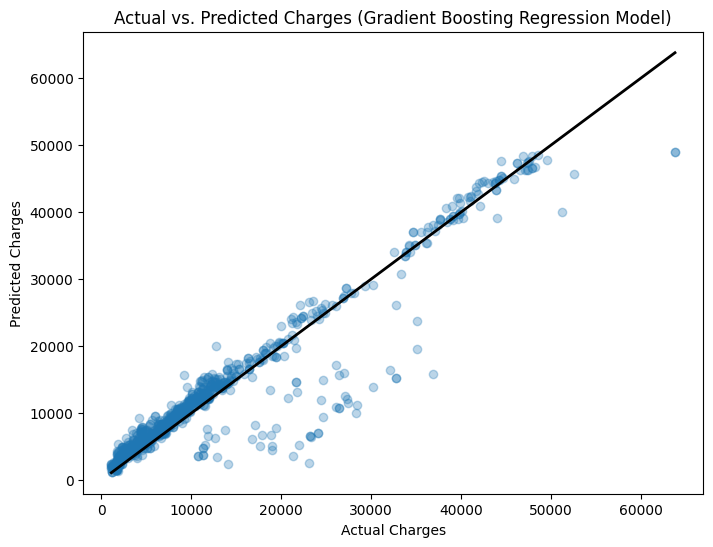

In [22]:
# plot actual vs predicted scatter plot for all models
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k-', lw=2)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f"Actual vs. Predicted Charges ({model_name} Model)")
    plt.show()
    
    # plot
for model_name, y_pred in models.items():
    plot_actual_vs_predicted(y_test, y_pred, model_name)

- Decision tree is the best performing model at 0.93 accuracy

- This means the model is correct 93% of the time